In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

In [2]:
df = pd.read_csv('GDP_change.csv')
df.head()

,Year,GDP
0,1962,-0.791615
1,1963,3.063226
2,1964,1.458597
3,1965,-10.088720
4,1966,2.580441


In [4]:
df.tail()

,Year,GDP
52,2014,1.024121
53,2015,0.586026
54,2016,0.173273
55,2017,-1.001638
56,2018,-0.356520


In [5]:
Time_Stamp = pd.date_range(start='1962-01-01',periods=len(df),freq='Y')
Time_Stamp

DatetimeIndex(['1962-12-31', '1963-12-31', '1964-12-31', '1965-12-31',
               '1966-12-31', '1967-12-31', '1968-12-31', '1969-12-31',
               '1970-12-31', '1971-12-31', '1972-12-31', '1973-12-31',
               '1974-12-31', '1975-12-31', '1976-12-31', '1977-12-31',
               '1978-12-31', '1979-12-31', '1980-12-31', '1981-12-31',
               '1982-12-31', '1983-12-31', '1984-12-31', '1985-12-31',
               '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31',
               '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31',
               '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31',
               '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31',
               '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
      

In [6]:
df['Time_Stamp'] = Time_Stamp

In [7]:
df.head()

,Year,GDP,Time_Stamp
0,1962,-0.791615,1962-12-31
1,1963,3.063226,1963-12-31
2,1964,1.458597,1964-12-31
3,1965,-10.088720,1965-12-31
4,1966,2.580441,1966-12-31


In [9]:
df.tail()

,Year,GDP,Time_Stamp
52,2014,1.024121,2014-12-31
53,2015,0.586026,2015-12-31
54,2016,0.173273,2016-12-31
55,2017,-1.001638,2017-12-31
56,2018,-0.356520,2018-12-31


In [10]:
df.drop('Year', axis=1, inplace=True)

In [11]:
df.set_index(keys='Time_Stamp',inplace=True)
df

,GDP
Time_Stamp,
1962-12-31,-0.791615
1963-12-31,3.063226
1964-12-31,1.458597
1965-12-31,-10.088720
1966-12-31,2.580441
1967-12-31,7.881292
1968-12-31,-4.438034
1969-12-31,3.151771
1970-12-31,-1.382471


In [12]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

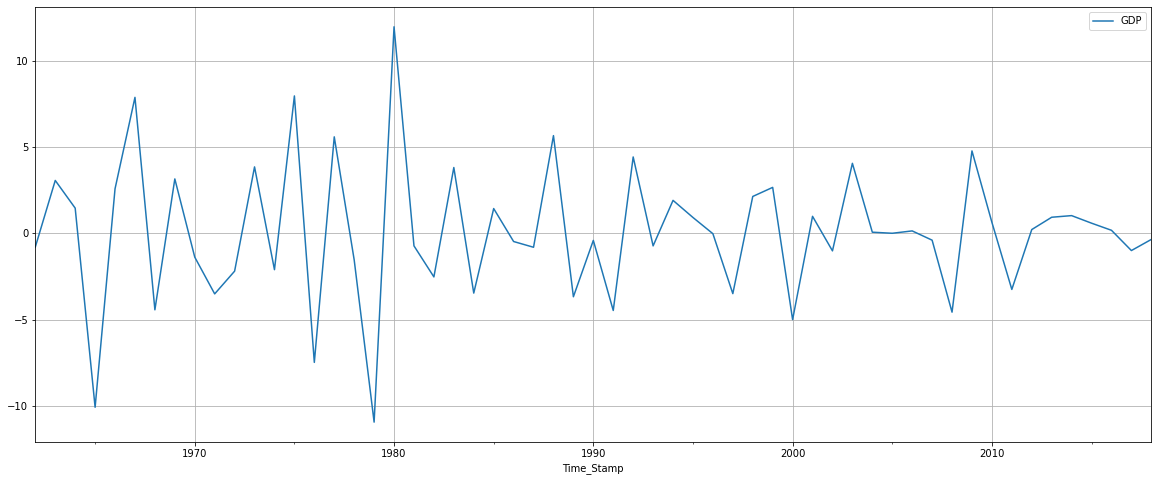

In [13]:
df.plot(grid=True);

In [14]:
df.describe()

,GDP
count,57.000000
mean,0.054186
std,4.052279
min,-10.950715
25%,-2.110185
50%,0.000494
75%,2.134595
max,11.974004


In [15]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

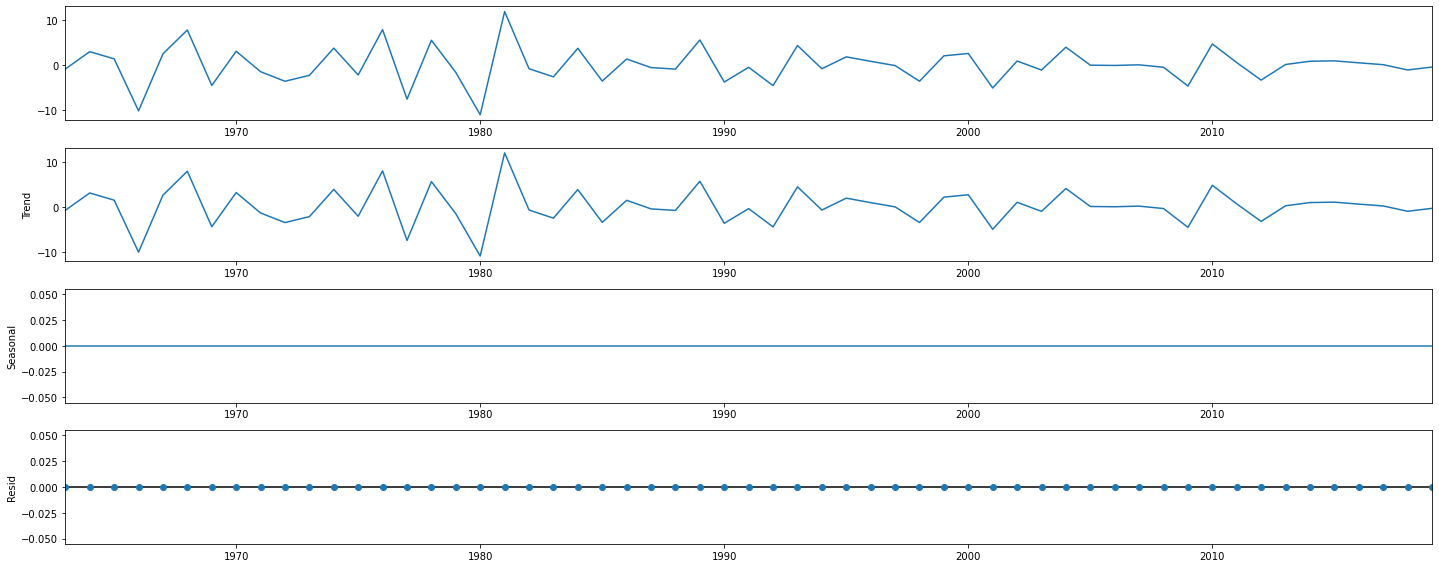

In [16]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [17]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1962-12-31    -0.791615
1963-12-31     3.063226
1964-12-31     1.458597
1965-12-31   -10.088720
1966-12-31     2.580441
1967-12-31     7.881292
1968-12-31    -4.438034
1969-12-31     3.151771
1970-12-31    -1.382471
1971-12-31    -3.514299
1972-12-31    -2.196232
1973-12-31     3.848822
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1962-12-31    0.0
1963-12-31    0.0
1964-12-31    0.0
1965-12-31    0.0
1966-12-31    0.0
1967-12-31    0.0
1968-12-31    0.0
1969-12-31    0.0
1970-12-31    0.0
1971-12-31    0.0
1972-12-31    0.0
1973-12-31    0.0
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1962-12-31    0.0
1963-12-31    0.0
1964-12-31    0.0
1965-12-31    0.0
1966-12-31    0.0
1967-12-31    0.0
1968-12-31    0.0
1969-12-31    0.0
1970-12-31    0.0
1971-12-31    0.0
1972-12-31    0.0
1973-12-31    0.0
Name: resid, dtype: float64 



ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.825
DF test p-value is 0.0004231557218362032
Number of lags used 9


In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

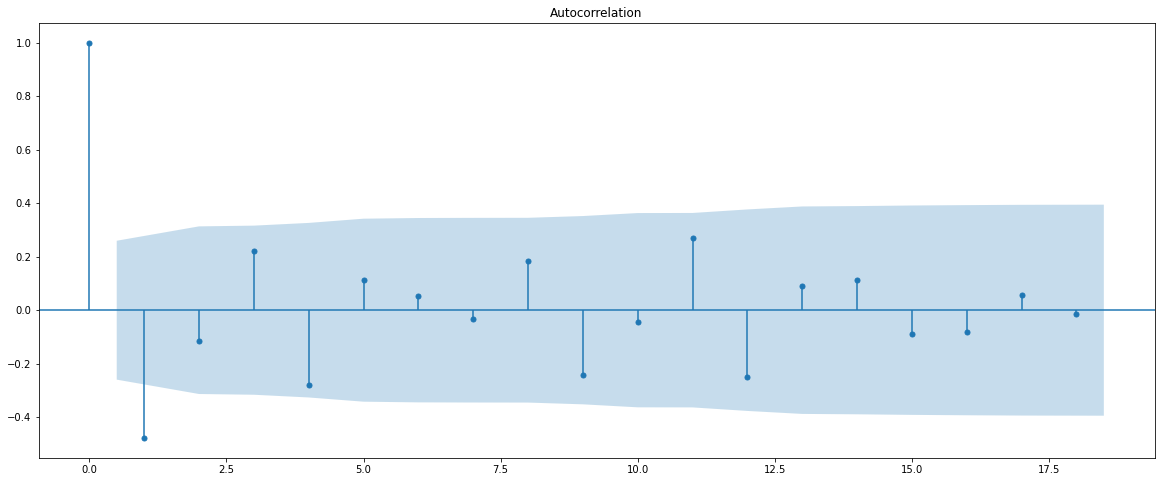

In [35]:
plot_acf(df,alpha=0.05,missing='drop');

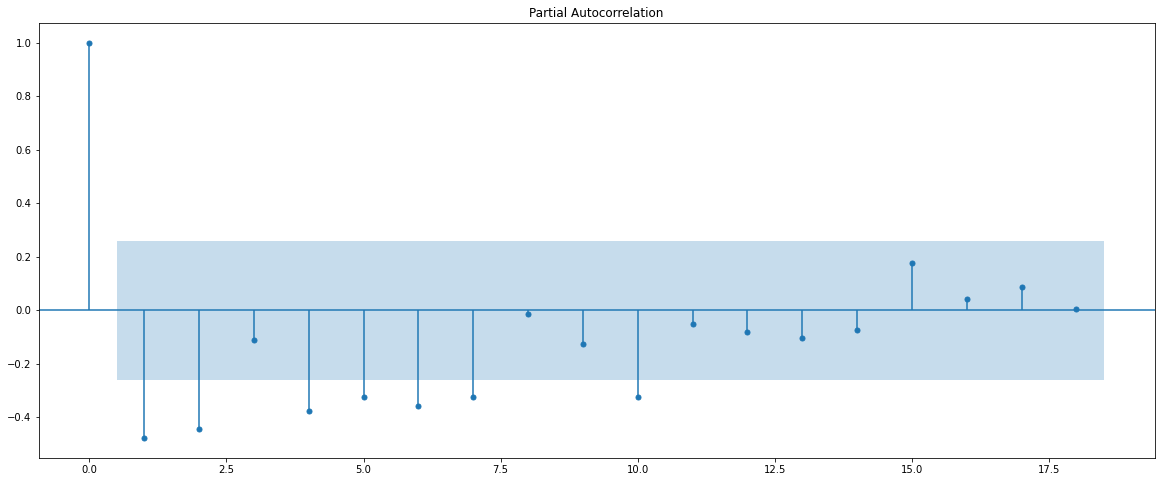

In [40]:
plot_pacf(df,alpha=0.05, method='ywmle');

In [24]:
df.index.year.unique()

Int64Index([1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
            1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
            1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018],
           dtype='int64', name='Time_Stamp')

In [29]:
from statsmodels.tsa.arima.model import ARIMA
from  statsmodels.tsa.statespace.sarimax import SARIMAX

# Now build a SARIMA model using the pdq and PDQ values identified above
auto_SARIMA_6 =SARIMAX(df['GDP'].values,
                                order=(2, 0, 3),
                                seasonal_order=None,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
results_auto_SARIMA_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   57
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -127.327
Date:                Sun, 01 Aug 2021   AIC                            266.655
Time:                        04:39:22   BIC                            278.476
Sample:                             0   HQIC                           271.201
                                 - 57                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5124      0.255     -2.008      0.045      -1.013      -0.012
ar.L2         -0.5553      0.188     -2.946      0.003      -0.925      -0.186
ma.L1         -0.7359      0.324     -2.273      0.023      -1.370      -0.101
ma.L2          0.0832      0.313      0.266      0.790      -0.530       0.696
ma.L3         -0.6409      0.281     -2.280      0.023      -1.192      -0.090
sigma2         5.3060      1.139      4.660      0.000       3.074       7.538
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                19.45
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.85
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

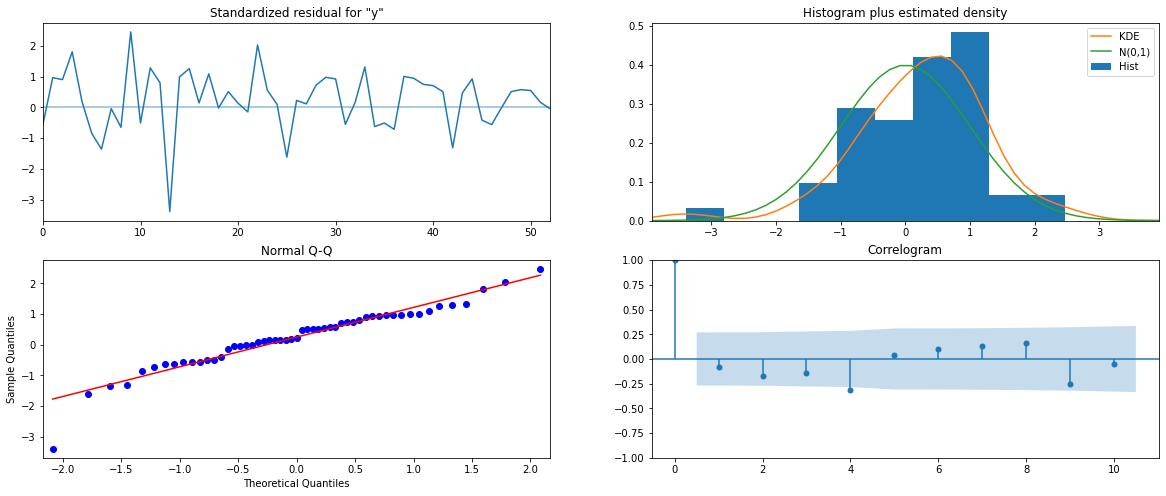

In [30]:
results_auto_SARIMA_6.plot_diagnostics();

In [31]:
# Now build a SARIMA model using the pdq and PDQ values identified above
auto_SARIMA_6 =SARIMAX(df['GDP'].values,
                                order=(3, 0, 5),
                                seasonal_order=None,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
results_auto_SARIMA_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   57
Model:               SARIMAX(3, 0, 5)   Log Likelihood                -116.670
Date:                Sun, 01 Aug 2021   AIC                            251.339
Time:                        04:39:36   BIC                            268.726
Sample:                             0   HQIC                           257.983
                                 - 57                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8390      0.275     -3.051      0.002      -1.378      -0.300
ar.L2         -0.2864      0.341     -0.840      0.401      -0.955       0.382
ar.L3         -0.0527      0.223     -0.236      0.813      -0.490       0.385
ma.L1         -0.2130   1283.776     -0.000      1.000   -2516.367    2515.941
ma.L2         -0.7660   1557.213     -0.000      1.000   -3052.847    3051.315
ma.L3         -0.0671    573.885     -0.000      1.000   -1124.861    1124.727
ma.L4         -0.0758    660.026     -0.000      1.000   -1293.703    1293.551
ma.L5          0.4382    562.602      0.001      0.999   -1102.242    1103.119
sigma2         5.2125   6691.739      0.001      0.999   -1.31e+04    1.31e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.57
Prob(Q):                              0.98   Prob(JB):                         0.28
Heteroskedasticity (H):               0.27   Skew:                            -0.55
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

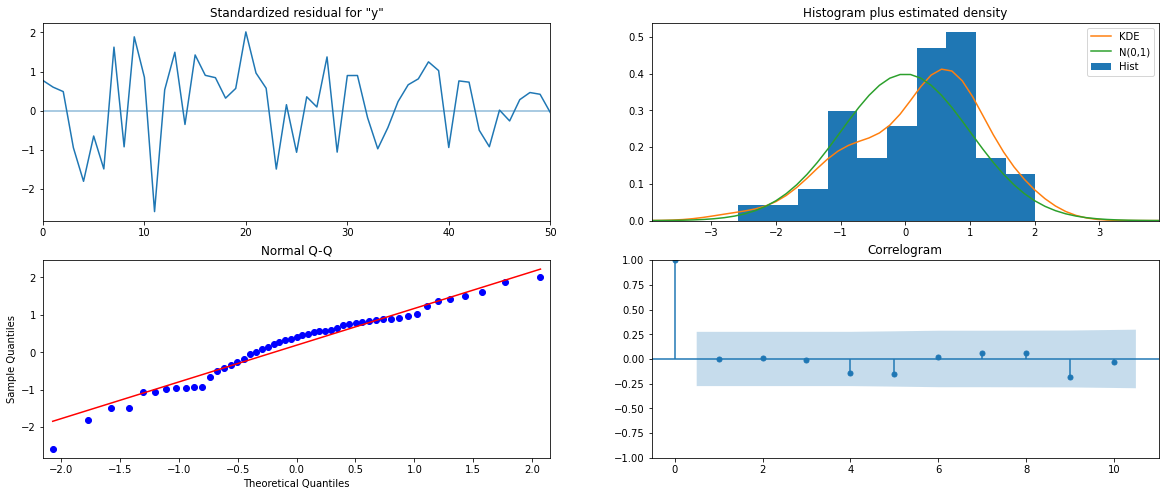

In [32]:
results_auto_SARIMA_6.plot_diagnostics();